## Programming Assignment 5
#### In this assignment, you will be implementing Tomasi-Kanade	Factorization algorithm	for Rigid Structure from Motion.

### Task 1
#### Load the data file and generate a 2D image dataset	by generating an orthographic camera with optical axis paralle to the XY plane, which rotates around the teapot	in 10° increments and always looks towards the center of the object
#### Note: Code for loading the point cloud and visualizing it has been given to you. Further build on it and take images of the teapot and visualize them

In [0]:
from scipy.io import loadmat
import numpy as np
import math
x = loadmat('teapot.mat')

In [0]:
a = []
b = []
c = []
for points in x['verts']:
    a.append(points[0])
    b.append(points[1])
    c.append(points[2])

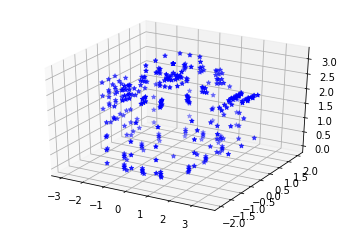

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a,b,c, c='b', marker='*')

In [0]:
intrinsic = np.array([[1, 0, 0],[0, 1, 0]])

def rotation_matrix_y(angle):
    rot_angle=math.radians(angle)
    R = np.array([[math.cos(rot_angle),0,math.sin(rot_angle)],[0,1,0],[-math.sin(rot_angle),0,math.cos(rot_angle)]])
    return R

def calculateRotation():
  rotation_matrix = []
  for degree in range(0,360,10):
    result=np.matmul(intrinsic,rotation_matrix_y(degree))
    rotation_matrix.append(result)
  return np.concatenate(rotation_matrix,axis=0)
def extractPoints(a,b,c):
  pList = []
  for a1,b1,c1 in zip(a,b,c):
    pList.append([a1,b1,c1])
  return np.array(pList).T

In [5]:
R = calculateRotation()
S = extractPoints(a,b,c)
print(S.shape)
print(R.shape)

(3, 306)
(72, 3)


In [6]:
result = np.matmul(R,S)
result.shape

(72, 306)

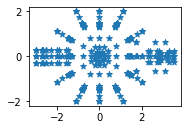

In [7]:
fig = plt.figure()
ax = fig.add_subplot(222)
ax.scatter(result[0],result[1],marker = "*") #sample visualization 

### Task 2
#### Use the data generated in previous task to generate a W matrix, and use that as input in Tomasi Kanade Factorization method to compute the 3D structure

In [0]:
#ref:https://github.com/IshitaTakeshi/Tomasi-Kanade/blob/master/tomasi_kanade.py
W = np.matmul(R,S)
u,s,vh = np.linalg.svd(W,full_matrices=True)
rhat = u[:, 0:3]
sigma=np.array([[s[0],0,0],[0,s[1],0],[0,0,s[2]]])
vhat = vh[0:3,:]
shat = np.matmul(sigma,vhat)

In [0]:
def calculateAB(rhat):
  alist = []
  blist = []
  rows = 36
  temp = 0
  for row in range(rows):
    r=np.reshape(rhat[temp:temp+2],(6))
    temp = temp+2
    a = r[0]*r[0]
    b = 2*r[0]*r[1]
    c = 2*r[0]*r[2]
    d = r[1]*r[1]
    e = 2*r[2]*r[1]
    f = r[2]*r[2]
    g = r[0]*r[3]
    h = r[1]*r[3]
    i = r[0]*r[4]
    j = r[2]*r[3]
    k = r[0]*r[5]
    l = r[1]*r[4]
    m = r[2]*r[4]
    n = r[1]*r[5]
    o = r[2]*r[5]
    p = r[3]*r[3]
    q = 2*r[3]*r[4]
    r2 = 2*r[3]*r[5]
    s = r[4]*r[4]
    t = 2*r[4]*r[5]
    u = r[5]*r[5]
    alist.append(np.array([[a,b,c,d,e,f],[g,h+i,j+k,l,m+n,o],[p,q,r2,s,t,u]]))
    blist.append(np.array([1,0,1]))
  alist = np.concatenate(alist,axis=0)
  blist = np.concatenate(blist,axis=0)
  alist = alist.reshape(108,6)
  blist = blist.reshape(108,1)
  return alist,blist

In [0]:
A,B = calculateAB(rhat)
inverse=np.linalg.inv(np.matmul(A.T,A))
temp = np.matmul(inverse,A.T)
qmat=np.matmul(temp,B)
qqtmat=np.array([[qmat[0],qmat[1],qmat[2]],[qmat[1],qmat[3],qmat[4]],[qmat[2],qmat[4],qmat[5]]])
qqtmat=qqtmat.reshape(3,3)
qmat=np.linalg.cholesky(qqtmat) 
qinv=np.linalg.inv(qmat)
s=np.matmul(qinv,shat)

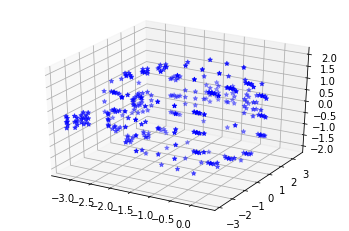

In [11]:
## Plot the reconstructed mode
a1 = s[0,:]
b1 = s[1,:]
c1 = s[2,:]
# In the base code above we copied the x, y and z component of the 3D points
# in teapot 3D model that we loaded from teapot.mat in variables a, b, and c respectively
# Assuming the x, y and z component of the reconstructed 3D points are 
# in variables a1, b1 and c1 respectively, the reconstructed model can be plotted as:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a1,b1,c1, c='b', marker='*')

In [0]:
a = []
b = []
c = []
for points in x['verts']:
    a.append(points[0])
    b.append(points[1])
    c.append(points[2])

In [13]:
## Evaluate your reconstruction
# In the base code above we copied the x, y and z component of the 3D points
# in teapot 3D model that we loaded from teapot.mat in variables a, b, and c respectively
# Assuming the x, y and z component of the 3D points that you have reconstructed are 
# in variables a1, b1 and c1 respectively, the error in reconstruction can be calcualted as:

err = 0.0
j = 0
for i in range(len(a1)):
  err = err + math.sqrt( ((a1[i]-a[i])*(a1[i]-a[i])) + ((b1[i]-b[i])*(b1[i]-b[i])) + ((c1[i]-c[i])*(c1[i]-c[i])) )
  j=j+1
  
print ("Mean Euclidean Error : ",(err/j))

Mean Euclidean Error :  3.8790907355306183
